### Task 3 notebook

NO LONGER DOING:

This is my notebook for MATH5271 task 3. The goal of this task will be to compare two different ways of interpolating missing climate data (such as from instrumental drop-out or cloud cover): an empirical orthogonal function (EOF) based reconstruction (e.g., Beckers and Rixen, 2003) , and a generative adversarial network (GAN) based imputation method (e.g., Li et al., 2019). The architecture used by the latter authors is published at the lead author's github https://github.com/steveli/misgan, and we will use this archiecture slightly modified for the purposes here.

The data to be used come from the Group for High Resolution Sea Surface Temperature (GHRSST). In particular, we will use their Level 4 K10_SST Global 10 km Analyzed Sea Surface Temperature from Naval Oceanographic Office (NAVO) (to cite etc etc.). We will use the daily snapshots supplied from this dataset for the year of 2020. 

DOING:

See Smith et al. (1996), Reconstruction of Historical Sea Surface Temperatures Using Empirical Orthogonal Functions
- https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2013RG000434
- file:///Users/mattpudig/Downloads/[15200442%20-%20Journal%20of%20Climate]%20Estimates%20of%20the%20Regional%20Distribution%20of%20Sea%20Level%20Rise%20over%20the%201950%E2%80%932000%20Period%20(1).pdf
- 

ICOADS SST: https://psl.noaa.gov/data/gridded/data.coads.2deg.html

ICOADS 1deg: https://psl.noaa.gov/data/gridded/data.coads.1deg.html

SST100: https://www.avl.class.noaa.gov/saa/products/search?datatype_family=SST100

NOAA IOSST: https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.html

In [137]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import glob

In [138]:
# Generate list of files stored on my local disk
SST100_file = glob.glob('/Users/mattpudig/Desktop/Uni/Honours/Coursework/5. Environmental Data Science/Portfolio/Task 3/NOAA_SST100/2*.nc')
# Load in as xarray dataset
SST100 = xr.open_mfdataset(paths=SST100_file, combine='by_coords')


/Users/mattpudig/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


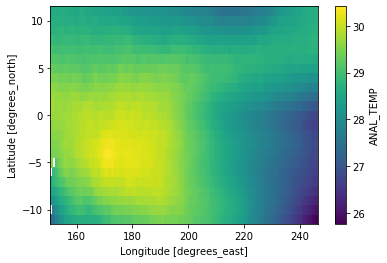

In [221]:
SST100.ANAL_TEMP.mean('TIME1').plot()

/Users/mattpudig/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


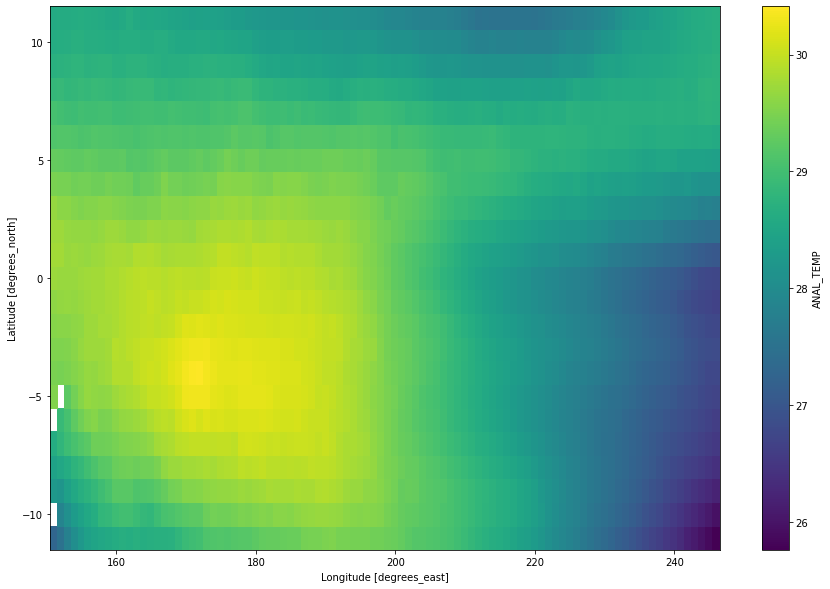

In [223]:
plt.figure(figsize=(15,10))
SST100.ANAL_TEMP.mean('TIME1').plot()

In [165]:
# Generate list of files stored on my local disk
ICOADS_file = glob.glob('/Users/mattpudig/Desktop/Uni/Honours/Coursework/5. Environmental Data Science/Portfolio/Task 3/ICOADS/sst*.nc')
# Load in as xarray dataset
ICOADS = xr.open_mfdataset(paths=ICOADS_file, combine='by_coords')


/Users/mattpudig/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mattpudig/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


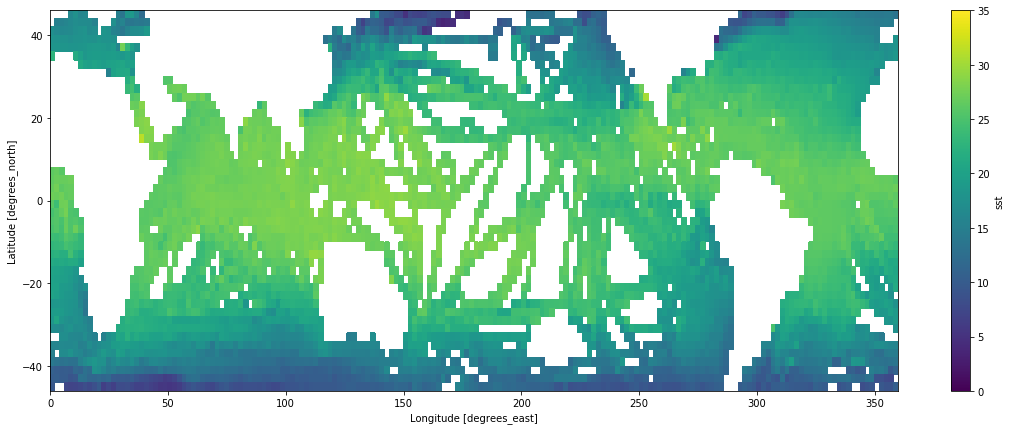

In [213]:
plt.figure(figsize=(19,7))
vmin = 0
vmax = 35
(ICOADS.sst.sel(time='1910').mean(dim='time').sel(lat=slice(45,-45))).plot(vmin=vmin, vmax=vmax, cmap='viridis')

In [214]:
# Generate list of files stored on my local disk
COBE_file = glob.glob('/Users/mattpudig/Desktop/Uni/Honours/Coursework/5. Environmental Data Science/Portfolio/Task 3/COBE_SST2/sst*.nc')
# Load in as xarray dataset
COBE = xr.open_mfdataset(paths=COBE_file, combine='by_coords')


/Users/mattpudig/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mattpudig/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


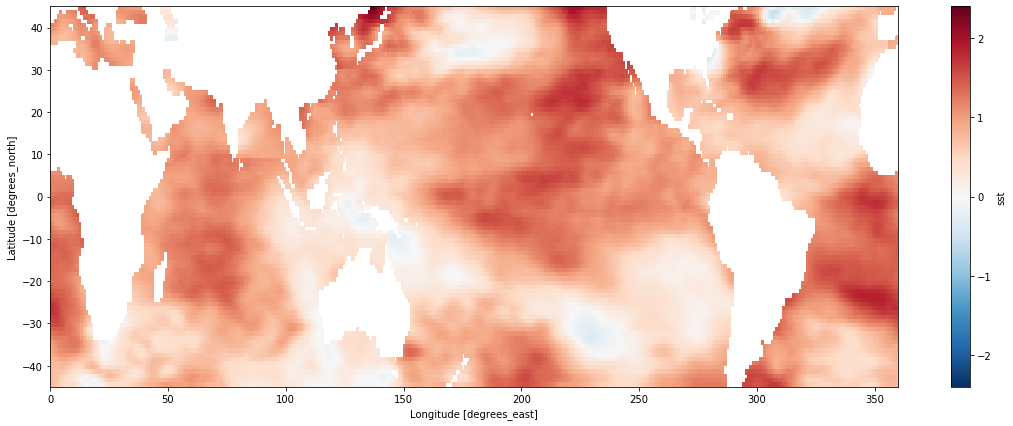

In [164]:
plt.figure(figsize=(19,7))
(COBE.sst.sel(time='2019').mean(dim='time').sel(lat=slice(45,-45)) - COBE.sst.sel(time='1850').mean(dim='time').sel(lat=slice(45,-45))).plot()

In [230]:
# Generate list of files stored on my local disk
NOAA_IOSST_file = glob.glob('/Users/mattpudig/Desktop/Uni/Honours/Coursework/5. Environmental Data Science/Portfolio/Task 3/NOAA_IOSST/s*.nc')
# Load in as xarray dataset
NOAA_IOSST = xr.open_mfdataset(paths=NOAA_IOSST_file, combine='by_coords')


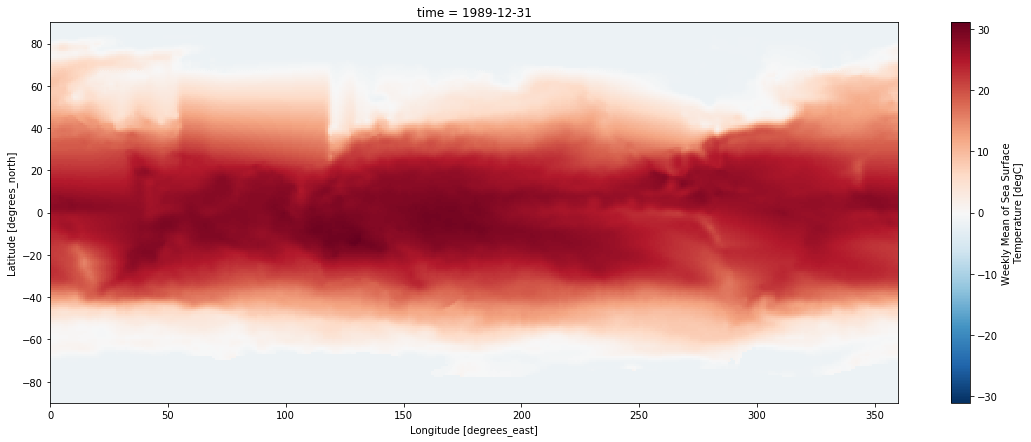

In [235]:
plt.figure(figsize=(19,7))
NOAA_IOSST.sst.isel(time=0).plot()

In [237]:
NOAA_IOSST.sst['time']

<xarray.DataArray 'time' (time: 1658)>
array(['1989-12-31T00:00:00.000000000', '1990-01-07T00:00:00.000000000',
       '1990-01-14T00:00:00.000000000', ..., '2021-09-19T00:00:00.000000000',
       '2021-09-26T00:00:00.000000000', '2021-10-03T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1989-12-31 1990-01-07 ... 2021-10-03
Attributes:
    long_name:      Time
    actual_range:   [69395. 80994.]
    delta_t:        0000-00-07 00:00:00
    avg_period:     0000-00-07 00:00:00
    standard_name:  time
    axis:           T
    bounds:         time_bnds

---
References
---
Beckers, J. M., & Rixen, M. (2003). EOF calculations and data filling from incomplete oceanographic datasets. Journal of Atmospheric and oceanic technology, 20(12), 1839-1856.

Li, S. C. X., Jiang, B., & Marlin, B. (2019). Misgan: Learning from incomplete data with generative adversarial networks. arXiv preprint arXiv:1902.09599.
